In [1]:
!pip install pandas-datareader
!pip install pmdarima
! pip install textBlob
! pip install vaderSentiment

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
import seaborn as sns
import datetime
import pandas_datareader.data as web
import matplotlib as mpl
from matplotlib import style
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from statsmodels.tsa.seasonal import seasonal_decompose


from textblob import TextBlob
from matplotlib.pyplot import figure
from matplotlib import rcParams
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 
import lightgbm

In [7]:

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020,11,11)

In [8]:
stocks = web.DataReader("ITC.NS", 'yahoo', start, end)

In [9]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2678 entries, 2010-01-04 to 2020-11-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2678 non-null   float64
 1   Low        2678 non-null   float64
 2   Open       2678 non-null   float64
 3   Close      2678 non-null   float64
 4   Volume     2678 non-null   float64
 5   Adj Close  2678 non-null   float64
dtypes: float64(6)
memory usage: 146.5 KB


In [10]:

stocks.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2010-01-04  85.000000  83.449997  84.333298  84.550003   5161635.0  62.131336
2010-01-05  85.583298  84.233299  84.933296  85.383301  10767225.0  62.743690
2010-01-06  86.233299  84.533302  86.233299  85.583298   7529979.0  62.890656
2010-01-07  86.166702  84.566704  85.666702  85.316704   4987434.0  62.694752
2010-01-08  86.166702  85.116699  85.116699  85.500000   4881351.0  62.829453

In [11]:
stocks.reset_index(inplace=True)

In [12]:

stocks.tail()

Date        High         Low        Open       Close      Volume  \
2673 2020-11-05  175.000000  170.199997  171.250000  174.750000  26997641.0   
2674 2020-11-06  177.199997  173.399994  176.500000  173.949997  34252005.0   
2675 2020-11-09  177.300003  171.850006  173.949997  172.800003  35286484.0   
2676 2020-11-10  179.550003  171.850006  175.000000  178.350006  57459436.0   
2677 2020-11-11  185.899994  178.600006  179.600006  185.300003  63318644.0   

       Adj Close  
2673  174.750000  
2674  173.949997  
2675  172.800003  
2676  178.350006  
2677  185.300003

In [13]:
stocks.shape

(2678, 7)

In [14]:
stocks.describe()

High          Low         Open        Close        Volume  \
count  2678.000000  2678.000000  2678.000000  2678.000000  2.678000e+03   
mean    212.070495   207.439945   209.913923   209.739825  1.240584e+07   
std      60.095878    59.150271    59.679336    59.533935  9.562774e+06   
min      81.400002    76.266701    78.366699    77.416702  0.000000e+00   
25%     171.149746   167.000000   168.975246   168.900253  7.335438e+06   
50%     221.617004   216.667007   218.866501   219.216499  9.816930e+06   
75%     258.299759   252.500000   255.000000   255.100006  1.395342e+07   
max     354.799988   340.299988   346.000000   342.500000  1.494797e+08   

         Adj Close  
count  2678.000000  
mean    184.067215  
std      60.853399  
min      56.889458  
25%     143.430019  
50%     189.412781  
75%     234.241127  
max     313.638275

# Data cleaning

In [15]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.head()

Date       High        Low       Open      Close      Volume  \
0 2010-01-04  85.000000  83.449997  84.333298  84.550003   5161635.0   
1 2010-01-05  85.583298  84.233299  84.933296  85.383301  10767225.0   
2 2010-01-06  86.233299  84.533302  86.233299  85.583298   7529979.0   
3 2010-01-07  86.166702  84.566704  85.666702  85.316704   4987434.0   
4 2010-01-08  86.166702  85.116699  85.116699  85.500000   4881351.0   

   Adj Close  
0  62.131336  
1  62.743690  
2  62.890656  
3  62.694752  
4  62.829453

# Missing Values

In [16]:

stocks.isna().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

# Visualizing the Data- close price

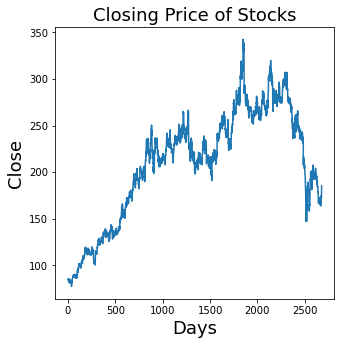

In [17]:
plt.figure(figsize=(5,5))
plt.title('Closing Price of Stocks', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close', fontsize = 18)
plt.plot(stocks['Close'])
plt.show()

# Visualizing the Data- Opening price

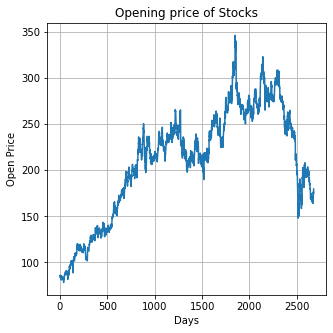

In [18]:

plt.figure(figsize=(5,5))
plt.grid(True)
plt.plot(stocks['Open'])
plt.xlabel('Days')
plt.ylabel('Open Price')
plt.title('Opening price of Stocks')
plt.show()


# Visualizing Stock Returns

Text(0.5, 1.0, 'Stock Returns')

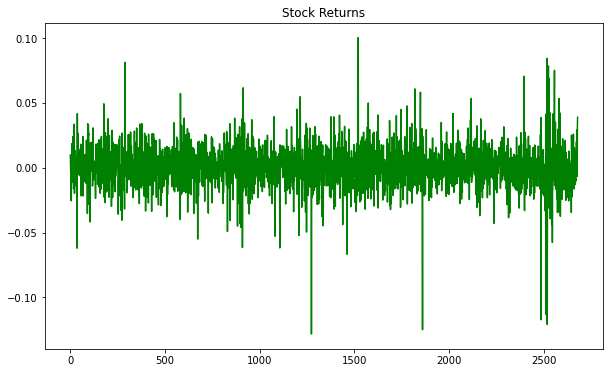

In [19]:

close = stocks['Close']
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Stock Returns")

# Time series Analysis -For Close Price
We can also perform the same analysis for Open price as well

Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. we need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

# Splitting data into train and test data

In [20]:

train = stocks[:1600]
test = stocks[1600:]

In [21]:

train.shape, test.shape

((1600, 7), (1078, 7))

# Decomposition of Time series
Stationarity
A stationary process has a mean and variance that do not change overtime and the process does not have trend.

The above time series does not look stationary.

To confirm that we will use “Dickey-Fuller test” to determine stationarity.

Dickey-Fuller test for variable

# Dickey-Fuller test

In [22]:
def adfullerTest(X):
    result = adfuller(X,autolag = 'AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No of Lags Used: %f' % result[2])
    print('Number of Obs Used: %f' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] <=0.05 :
         print("Reject against the null hypothesis, time series is stationary")
    else:
        print("Accept null hypothesis, time series is non-stationary ")

In [23]:

adfullerTest(train['Close'])

ADF Statistic: -1.480486
p-value: 0.543141
No of Lags Used: 23.000000
Number of Obs Used: 1576.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


# Rolling Statistics

Text(0.5, 1.0, 'Mean and Standard Deviation on  transformed data')

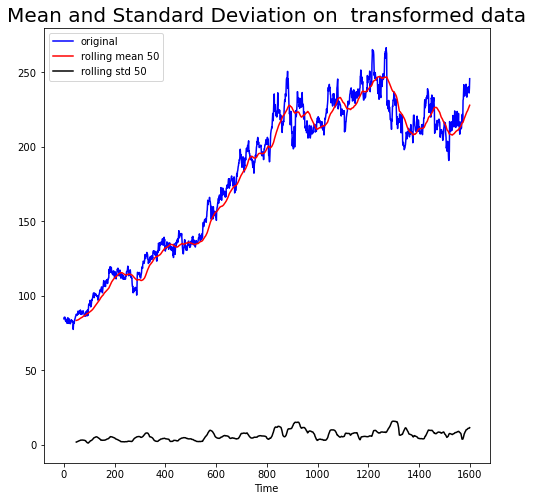

In [24]:
rolling_mean_50 = (train['Close']).rolling(window=50).mean()
rolling_std_50 = (train['Close']).rolling(window=50).std()
plt.figure(figsize = (8,8))
plt.plot((train['Close']), color = 'blue', label = 'original')
plt.plot(rolling_mean_50, color = 'red', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'black', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on  transformed data',  fontsize = 20)



Since the data shows changing variance over time, the first thing we will do is stabilize the variance by applying log transformation using the log() function. The resulting series will be a linear time series.

# Log Transfromation
Let’s log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [25]:

train_log = np.log(train['Close']) 
test_log = np.log(test['Close'])

In [26]:
from numpy import log
adfullerTest(log(train['Close']))

ADF Statistic: -1.862940
p-value: 0.349691
No of Lags Used: 4.000000
Number of Obs Used: 1595.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Accept null hypothesis, time series is non-stationary 


Running this shows a negative value for the test statistic.

We can see that the value is larger than the critical values, again, meaning that we can fail to reject the null hypothesis and in turn that the time series is non-stationary.

Text(0.5, 1.0, 'Mean and Standard Deviation on Log transformed data')

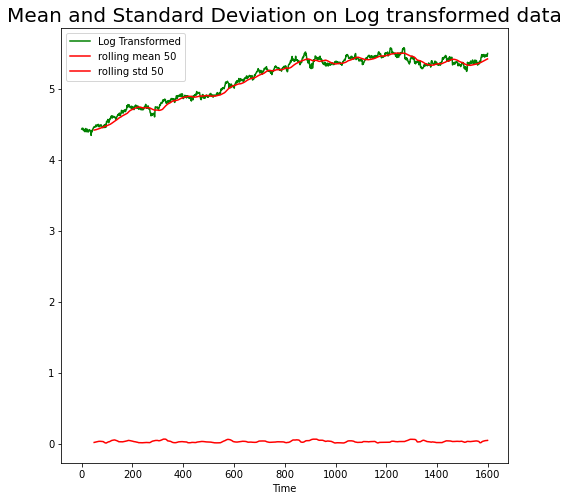

In [27]:

rolling_mean_50 = log(train['Close']).rolling(window=50).mean()
rolling_std_50 = log(train['Close']).rolling(window=50).std()
plt.figure(figsize = (8,8))
plt.plot(log(train['Close']), color = 'g', label = 'Log Transformed')
plt.plot(rolling_mean_50, color = 'r', label = 'rolling mean 50')
plt.plot(rolling_std_50, color = 'r', label = 'rolling std 50')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Log transformed data',  fontsize = 20)

To Removing Linear Trend
We will now perform the first difference transformation to our series to remove the linear trend.

In [28]:

mean_log = log(train['Close']).rolling(50).mean()

In [29]:
train_log_diff = log(train['Close']) - mean_log
train_log_diff.dropna(inplace = True)
adfullerTest(train_log_diff)

ADF Statistic: -6.910127
p-value: 0.000000
No of Lags Used: 0.000000
Number of Obs Used: 1550.000000
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568
Reject against the null hypothesis, time series is stationary


Text(0.5, 1.0, 'Mean and Standard Deviation on Differential Log Transformed data')

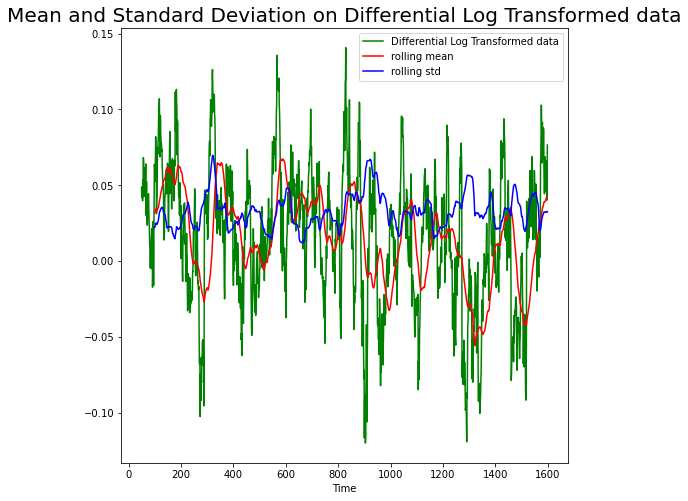

In [30]:
data=   train_log_diff
mean = data.rolling(50).mean()
std = data.rolling(50).std()
plt.figure(figsize = (8,8))
plt.plot(data, color = 'g', label = 'Differential Log Transformed data')
plt.plot(mean, color = 'r', label = 'rolling mean')
plt.plot(std, color = 'b', label = 'rolling std')
plt.xlabel('Time')
plt.legend()
plt.title('Mean and Standard Deviation on Differential Log Transformed data',  fontsize = 20)

Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure. Here we can also observe that there is no such trend in mean and Standard deviation So the now time series is statinary

Now the data is stationary we can apply ARIMA model to our data

# ARIMA Model
AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.

In [31]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                             # start_p=1, 
                              #start_q=1,
                              #test="adf",
                              trace=True,
                              error_action = 'ignore',
                              suppress_warnings = True)
    return autoarima_model

In [32]:
stocks_arima = arimamodel((train_log))
stocks_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-8773.541, Time=5.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8772.515, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-8771.158, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-8771.204, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8771.577, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-8776.012, Time=0.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8771.643, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-8769.181, Time=1.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-8777.420, Time=0.90 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-8777.612, Time=0.40 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-8778.949, Time=0.85 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-8777.021, Time=0.62 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-8777.391, Time=0.64 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=-8775.695, Time=1.20 sec
 ARIMA(0,1,4)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1600
Model:               SARIMAX(0, 1, 4)   Log Likelihood                4395.475
Date:                Tue, 24 Nov 2020   AIC                          -8778.949
Time:                        19:38:55   BIC                          -8746.687
Sample:                             0   HQIC                         -8766.969
                               - 1600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.000      2.018      0.044    1.89e-05       0.001
ma.L1         -0.0267      0.023     -1.183      0.237      -0.071       0.018
ma.L2         -0.0347      0.025     -1.395      0.163      -0.084       0.014
ma.L3         -0.0705      0.026     -2.665      0.008      -0.122      -0.019
ma.L4         -0.0455      0.023     -1.954      0.051      -0.091       0.000
sigma2         0.0002   4.57e-06     52.438      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       45.31   Jarque-Bera (JB):              2381.47
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.40   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

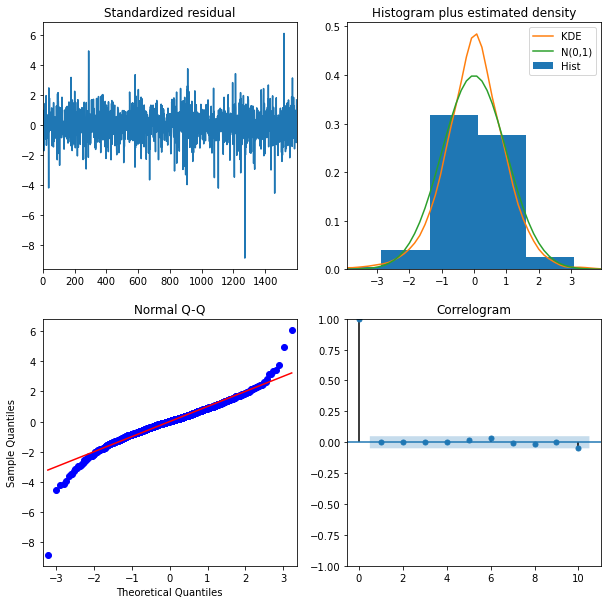

In [33]:

stocks_arima.plot_diagnostics(figsize=(10,10))
plt.show()

# Predictions on test data

In [34]:
predict_ClosePrice = stocks_arima.predict(n_periods = len(test_log))
predict_ClosePrice = pd.DataFrame(predict_ClosePrice,index = test_log.index,columns=['predict_ClosePrice'])

Text(0, 0.5, 'Actual Stock Price')

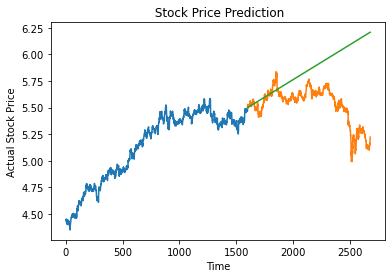

In [35]:

plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predict_ClosePrice, label='Prediction')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

# Validation of Arima Model

In [36]:
print('Mean Squared Error      ',mean_squared_error(test_log, predict_ClosePrice))
print('Root Mean_Squared_Error ',np.sqrt(mean_squared_error(test_log, predict_ClosePrice)))
print('Mean Absolute Error     ',mean_absolute_error(test_log, predict_ClosePrice))
print('R-Squared               ',r2_score(test_log, predict_ClosePrice))

Mean Squared Error       0.2145288259501037
Root Mean_Squared_Error  0.4631725660594588
Mean Absolute Error      0.3370431865467404
R-Squared                -6.690783956833727


# Analyzing news dataset

In [37]:
news=pd.read_csv("E:/MBA(BA) 3rd sem/Mini Project/india-news-headlines.csv/india-news-headlines.csv")

In [38]:
news.head()

publish_date headline_category  \
0      20010101        sports.wwe   
1      20010102           unknown   
2      20010102           unknown   
3      20010102           unknown   
4      20010102           unknown   

                                       headline_text  
0  win over cena satisfying but defeating underta...  
1  Status quo will not be disturbed at Ayodhya; s...  
2                Fissures in Hurriyat over Pak visit  
3              America's unwanted heading for India?  
4                 For bigwigs; it is destination Goa

In [39]:
news['publish_date'] = pd.to_datetime(news['publish_date'],format= '%Y%m%d')
news.head()
news.tail()

publish_date                 headline_category  \
3297167   2020-06-30                      gadgets-news   
3297168   2020-06-30     entertainment.hindi.bollywood   
3297169   2020-06-30     entertainment.hindi.bollywood   
3297170   2020-06-30     entertainment.hindi.bollywood   
3297171   2020-06-30  entertainment.telugu.movies.news   

                                             headline_text  
3297167      why tiktok removed 1 65 crore videos in india  
3297168  apurva asrani calls alia bhatts mother soni ra...  
3297169  kangana ranaut gets a doll version of herself ...  
3297170  meezaan jaffrey reminisces his childhood days ...  
3297171  prabhas20 titled as radhe shyam prabhas and po...

In [40]:

news.isna().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [41]:
news.shape

(3297172, 3)

In [42]:
(news.columns)

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')

# Analaysing "HEADLINE_CATEGORY" with "CITIES"

In [43]:
news['headline_category'].value_counts().head()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
Name: headline_category, dtype: int64

In [44]:
cities = news[news['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
cities.head(10)

publish_date headline_category  \
274    2001-01-04    city.bengaluru   
275    2001-01-04        city.patna   
278    2001-01-04    city.bengaluru   
279    2001-01-04        city.delhi   
643    2001-01-10        city.patna   
644    2001-01-10        city.patna   
645    2001-01-10        city.patna   
646    2001-01-10        city.patna   
2195   2001-03-09        city.delhi   
3559   2001-04-23    city.ahmedabad   

                                          headline_text  
274                 Three in race for chief secy's post  
275      Druggists' stir leads to shortage of medicines  
278                             He's not so inscrutable  
279                              DPCC stages Nyay rally  
643            Fend for yourselves; Pande tells doctors  
644   Bureaucracy undermining legislature's 'existence'  
645               State police collapses under pressure  
646             Court declares Pappu Yadav an absconder  
2195  Maneka asks govt to take back land for cow she...  
3559  Killer was promised Rs 25;000 for killing Nair...

In [45]:

city = pd.DataFrame(columns = ['city_name'])
city['city_name'] = cities.headline_category.str.split('.',expand = True)[1]
cities = pd.concat([cities, city], axis = 1)
cities.head()

publish_date headline_category  \
274   2001-01-04    city.bengaluru   
275   2001-01-04        city.patna   
278   2001-01-04    city.bengaluru   
279   2001-01-04        city.delhi   
643   2001-01-10        city.patna   

                                      headline_text  city_name  
274             Three in race for chief secy's post  bengaluru  
275  Druggists' stir leads to shortage of medicines      patna  
278                         He's not so inscrutable  bengaluru  
279                          DPCC stages Nyay rally      delhi  
643        Fend for yourselves; Pande tells doctors      patna

In [46]:
cities.drop('headline_category', inplace =True,axis =1)

In [47]:

cities.head()

publish_date                                   headline_text  city_name
274   2001-01-04             Three in race for chief secy's post  bengaluru
275   2001-01-04  Druggists' stir leads to shortage of medicines      patna
278   2001-01-04                         He's not so inscrutable  bengaluru
279   2001-01-04                          DPCC stages Nyay rally      delhi
643   2001-01-10        Fend for yourselves; Pande tells doctors      patna

In [48]:

cites = cities.groupby(cities['city_name']).agg({'headline_text':'count'})
cites.head()

headline_text
city_name               
agartala            1177
agra                4043
ahmedabad          85813
ajmer               1319
allahabad          18767

In [49]:
cites.rename(columns = {'headline_text':'headline_count'}, inplace = True)

In [50]:
cites = cites.sort_values(by='headline_count',ascending=False)
cites.head()

headline_count
city_name                 
mumbai              132649
delhi               124658
chandigarh          107464
hyderabad            99014
bengaluru            91857

In [51]:

top10cites = cites.head(10)

In [52]:
def fig_plot(top10cites,title1):
    fig = px.line(top10cites,title =title1)
    for i in top10cites.columns[0:]:
        fig.add_bar(x= top10cites.index ,y = top10cites['headline_count'],name = i)
    fig.show()

In [53]:
fig_plot(top10cites,'Count of Headlines for top10 Cities')

In [54]:

cities.head()

publish_date                                   headline_text  city_name
274   2001-01-04             Three in race for chief secy's post  bengaluru
275   2001-01-04  Druggists' stir leads to shortage of medicines      patna
278   2001-01-04                         He's not so inscrutable  bengaluru
279   2001-01-04                          DPCC stages Nyay rally      delhi
643   2001-01-10        Fend for yourselves; Pande tells doctors      patna

# Analaysing "HEADLINE_CATEGORY" with "CATEGORIES"

In [55]:

news.head()

publish_date headline_category  \
0   2001-01-01        sports.wwe   
1   2001-01-02           unknown   
2   2001-01-02           unknown   
3   2001-01-02           unknown   
4   2001-01-02           unknown   

                                       headline_text  
0  win over cena satisfying but defeating underta...  
1  Status quo will not be disturbed at Ayodhya; s...  
2                Fissures in Hurriyat over Pak visit  
3              America's unwanted heading for India?  
4                 For bigwigs; it is destination Goa

In [56]:
news['category']=news['headline_category'].str.split('.').map(lambda x : x[0])

In [57]:
categories = news.groupby(['category']).agg({'headline_text':'count'}).sort_values(by='headline_text',ascending = False)
news_cat=categories.head(10)
news_cat.reset_index(inplace = True)
news_cat

category  headline_text
0           city        1842498
1          india         285619
2  entertainment         224877
3        unknown         207732
4       business         153876
5         sports         129494
6           home          77208
7          world          63054
8     life-style          43370
9             tv          37819

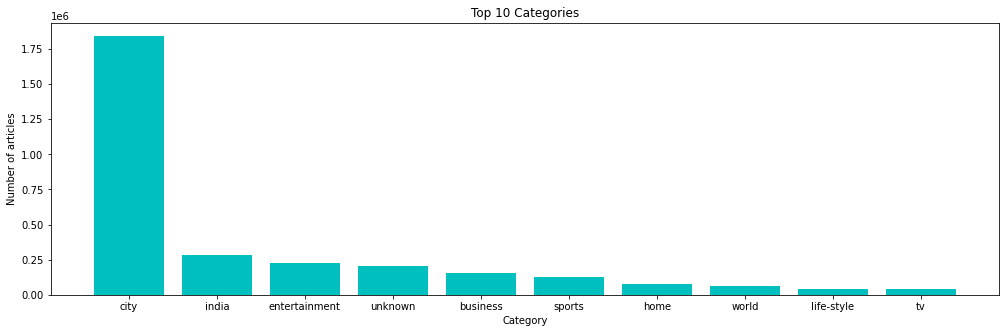

In [58]:
import matplotlib.colors as mcolors
plt.figure(figsize=(17,5))
plt.bar(news_cat.category,height= news_cat.headline_text, color = 'c')
plt.xlabel('Category')
plt.ylabel('Number of articles')
plt.title('Top 10 Categories')
plt.show()

In [59]:

news.drop('headline_category', inplace  = True, axis =1)
news.head()

publish_date                                      headline_text category
0   2001-01-01  win over cena satisfying but defeating underta...   sports
1   2001-01-02  Status quo will not be disturbed at Ayodhya; s...  unknown
2   2001-01-02                Fissures in Hurriyat over Pak visit  unknown
3   2001-01-02              America's unwanted heading for India?  unknown
4   2001-01-02                 For bigwigs; it is destination Goa  unknown

# Cleaning the data -Removing Stop words

In [60]:
headline_text = ' '.join(news['headline_text'].str.lower())

In [61]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:

wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words=1000).generate(headline_text)

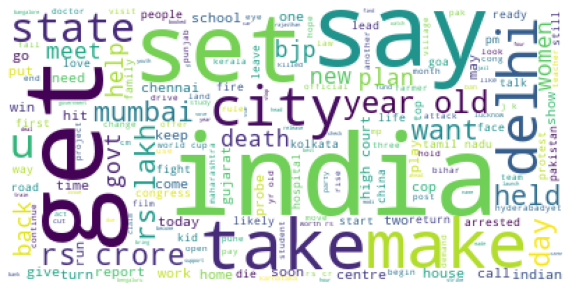

In [63]:
rcParams['figure.figsize'] = 10, 10
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentimental Analaysis -- Assigning Polarity to the Headlines

In [64]:

# Create a function to get the subjectivity
def Subjectivity(text):
       return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def Polarity(text):
      return  TextBlob(text).sentiment.polarity

In [65]:

news['Subjectivity'] =news['headline_text'].apply(Subjectivity)
news['Polarity'] =news['headline_text'].apply(Polarity)

In [66]:
pip install nltk

In [67]:

import nltk
nltk.download('vader_lexicon')






[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rajsh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [68]:
senti = SentimentIntensityAnalyzer()

In [69]:

news['Compound'] = [senti.polarity_scores(s)['compound'] for s in news['headline_text']]
news['Negative'] = [senti.polarity_scores(s)['neg'] for s in news['headline_text']]
news['Neutral'] = [senti.polarity_scores(s)['neu'] for s in news['headline_text']]
news['Positive'] = [senti.polarity_scores(s)['pos'] for s in news['headline_text']]

# Hybrid model - Combining Stocks data and news data

In [70]:
news.rename(columns = {'publish_date':'Date'}, inplace = True)

In [71]:
df_merge = pd.merge(stocks, news, how='inner', on=['Date'])
df_merge.head()

Date  High        Low       Open      Close     Volume  Adj Close  \
0 2010-01-04  85.0  83.449997  84.333298  84.550003  5161635.0  62.131336   
1 2010-01-04  85.0  83.449997  84.333298  84.550003  5161635.0  62.131336   
2 2010-01-04  85.0  83.449997  84.333298  84.550003  5161635.0  62.131336   
3 2010-01-04  85.0  83.449997  84.333298  84.550003  5161635.0  62.131336   
4 2010-01-04  85.0  83.449997  84.333298  84.550003  5161635.0  62.131336   

                               headline_text       category  Subjectivity  \
0                    Bebo Khan't stop loving  entertainment          0.95   
1              Chor Bazaari top song of 2009  entertainment          0.50   
2             2010...movies; magic 'n' more!  entertainment          0.75   
3          Ministers; Bollywood and cricket!  entertainment          0.00   
4  Shabana gives a mind-blowing performance!  entertainment          0.00   

   Polarity  Compound  Negative  Neutral  Positive  
0    0.6000   -0.3089     0.447    0.284     0.268  
1    0.5000    0.2023     0.000    0.735     0.265  
2    0.5625    0.0000     0.000    1.000     0.000  
3    0.0000    0.0000     0.000    1.000     0.000  
4    0.0000    0.0000     0.000    1.000     0.000

In [72]:

df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df.head()

Close  Subjectivity  Polarity  Compound  Negative  Neutral  Positive
0  84.550003          0.95    0.6000   -0.3089     0.447    0.284     0.268
1  84.550003          0.50    0.5000    0.2023     0.000    0.735     0.265
2  84.550003          0.75    0.5625    0.0000     0.000    1.000     0.000
3  84.550003          0.00    0.0000    0.0000     0.000    1.000     0.000
4  84.550003          0.00    0.0000    0.0000     0.000    1.000     0.000

In [73]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

Close  Subjectivity  Polarity  Compound  Negative  Neutral  Positive
0  0.02691          0.95   0.80000  0.340604     0.447    0.284     0.268
1  0.02691          0.50   0.75000  0.604218     0.000    0.735     0.265
2  0.02691          0.75   0.78125  0.499897     0.000    1.000     0.000
3  0.02691          0.00   0.50000  0.499897     0.000    1.000     0.000
4  0.02691          0.00   0.50000  0.499897     0.000    1.000     0.000

# Spliting Data into Train and test

In [74]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [76]:
X_train.shape , X_test.shape

((1320325, 6), (330082, 6))

In [77]:
def func_graph(results,names):
    fig = plt.figure()
    fig.suptitle('MSE value of all Algorithms Comparison')
    ax = fig.add_subplot(111)
    width = 0.5        
    bars=plt.bar(names,results, width, align='center')
    ax.set_xticklabels(names)
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval +0.005, yval)
    plt.show()

In [78]:
from sklearn import metrics

def metric_calc(name,model,category, X_train, Y_train, X_test, Y_test):
    if category =='TRAINING DATA' :
        X_data= X_train
        Y_data=Y_train
    else :
        X_data= X_test
        Y_data=Y_test
        
    model.fit(X_train, Y_train)
    predictions = model.predict(X_data)
    mse =round(metrics.mean_squared_error(predictions,Y_data),4)   
    print('For ', name, 'MSE-Value is ', mse)
    return mse

In [79]:
def func_modelling(i) :
    count=0
    count=count+1
    X = X_train[i]
    Y = Y_train
    x_test = X_test[i]
    seed = 7
    # preparing models list
    models = []
    models.append(('Decision Tree',' DecisiontreeRegressor  ', DecisionTreeRegressor()))
    models.append(('Random Forest',' RandomForestRegressor  ', RandomForestRegressor()))
    models.append(('XG Boost',' XGBRegressor  ', xgboost.XGBRegressor()))
    models.append(('LG Boost',' LGBMRegressor ', lightgbm.LGBMRegressor()))
    models.append(('ADA Boost',' AdaBoostRegressor ', AdaBoostRegressor()))
    results_train = []
    results_test = []
    names = []
    scoring = 'MSE'

    print('Metrics calcuated while TRANING the model')
    for name,label, model in models:
            cv_results_train=metric_calc(name,model,'TRAINING DATA',X,Y, x_test,Y_test)
            results_train.append(cv_results_train)
            names.append(name)
    func_graph(results_train,names)
    
    print('Evaluating the model on TESTING DATA')
    for name,label, model in models:
            cv_results_test=metric_calc(name,model,'TESTING DATA',X,Y, x_test,Y_test)
            results_test.append(cv_results_test)
            #names.append(name)
    func_graph(results_test,names)

# Training the model

Metrics calcuated while TRANING the model
For  Decision Tree MSE-Value is  0.0397
For  Random Forest MSE-Value is  0.0404
For  XG Boost MSE-Value is  0.0454
For  LG Boost MSE-Value is  0.0457
For  ADA Boost MSE-Value is  0.048


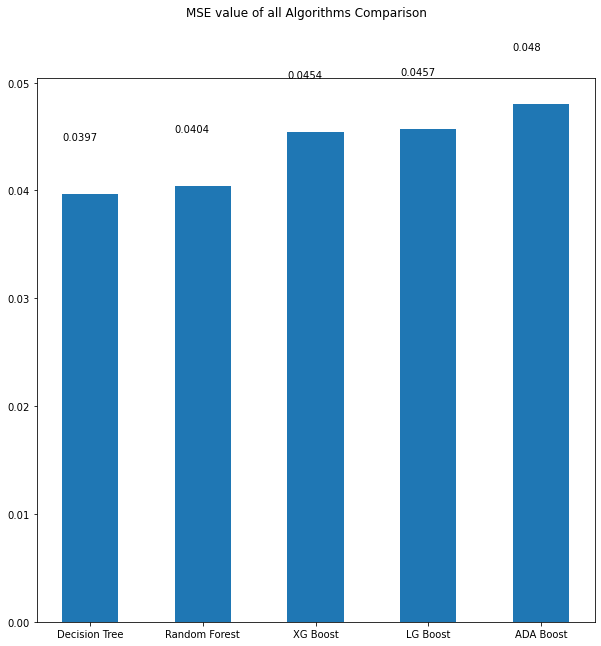

Evaluating the model on TESTING DATA
For  Decision Tree MSE-Value is  0.0506
For  Random Forest MSE-Value is  0.0468
For  XG Boost MSE-Value is  0.0457
For  LG Boost MSE-Value is  0.0458
For  ADA Boost MSE-Value is  0.0479


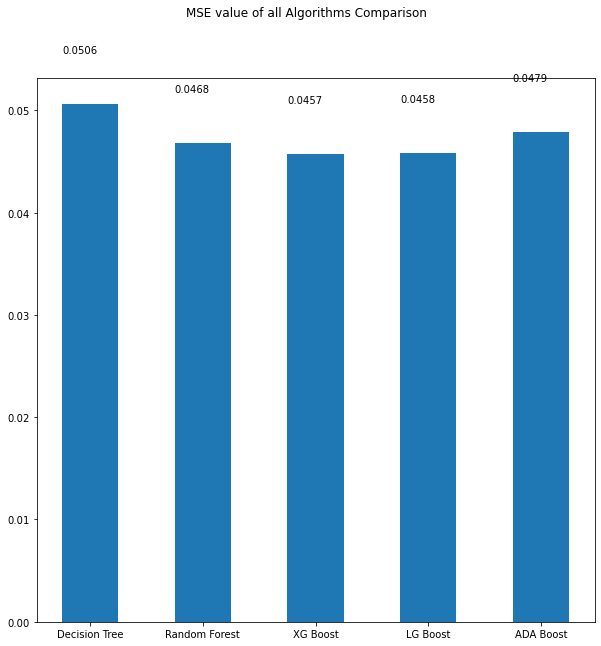

In [80]:
func_modelling(X_train.columns)

LGBMRegressor has the least MSE and it has performed best for sentimental Anaylsis to predict if the stock close price with either increase or decrease depending on the news on that day.